In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

# Loading the data

In [2]:
df = pd.read_csv('/home/hiraditya/Desktop/HomeWork/SJSU/cs156/jupiter/JupyterBooks/homework5_input_data.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [4]:
df['class']

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
#df.info(verbose = True)

#  Converting categorical variable to numeric

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['class'])

df = df.drop('class', axis = 1)
X = pd.get_dummies(df, columns = df.columns, prefix = df.columns)

In [9]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Breaking the data into the training and test datasets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Training a decision tree model (DecisionTreeClassifier) and Reporting 5-fold cross-validation accuracies

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print(" Individual cross-validation accuracies:", scores,"\n Mean Cross-Validation Accuracies:", np.mean(scores))

 Individual cross-validation accuracies: [1. 1. 1. 1. 1.] 
 Mean Cross-Validation Accuracies: 1.0


#  Training a decision tree model on all the training data

In [13]:
from sklearn.metrics import accuracy_score

clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# accuracy
accuracy_score(preds, y_test)

1.0

# confusion matrix (non-normalized)

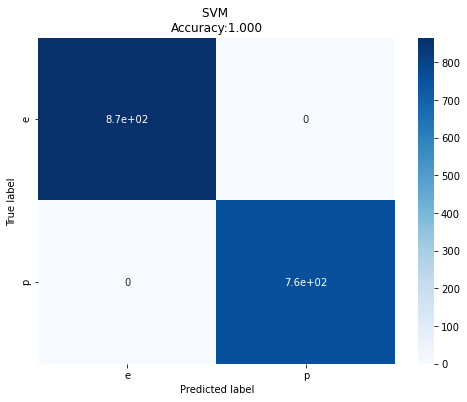

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds) 
cm_df = pd.DataFrame(cm, index = le.classes_, columns = le.classes_)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
# StandardScaler =  (actual - mean) / standard dev

# confusion matrix (normalized)

In [17]:
from sklearn.preprocessing import StandardScaler # preprocessing stuff
scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2)

clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# accuracy
accuracy_score(preds, y_test)

1.0

In [18]:
X_norm

array([[-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
         4.59086996, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [ 4.11988487, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       ...,
       [-0.24272523, -0.02219484,  1.2559503 , ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197],
       [-0.24272523, -0.02219484, -0.79620985, ..., -0.40484176,
        -0.21782364, -0.15558197]])

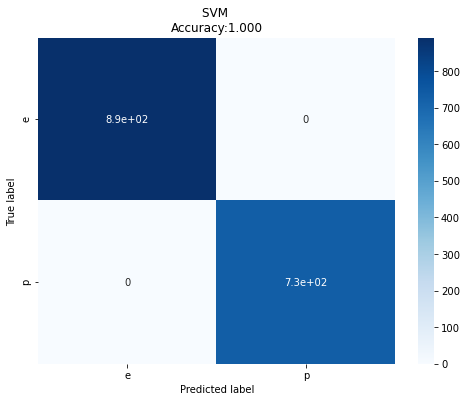

In [19]:
cm = confusion_matrix(y_test, preds) 
cm_df = pd.DataFrame(cm, index = le.classes_, columns = le.classes_)

plt.figure(figsize=(8, 6))
sb.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()